In [1]:
# Bibliotecas
import os
from time import sleep
from datetime import datetime
import numpy as np
import random
import sympy as sp
from sympy.abc import s, t
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sympy import Eq  # , Poly, exp
from sympy import fraction
from scipy import signal
import scipy.signal as signal
from scipy.stats import pearsonr


In [2]:
# salvar figura
def salvar_figura(nome_arquivo, pasta='figs', extensao='png', dpi=300, adicionar_data=True):
    """
    Salva a figura atual do matplotlib na pasta especificada.

    Parâmetros:
    - nome_arquivo (str): nome base do arquivo (sem extensão)
    - pasta (str): diretório onde o arquivo será salvo
    - extensao (str): extensão do arquivo ('png', 'jpg', 'pdf' etc.)
    - dpi (int): resolução da imagem
    - adicionar_data (bool): se True, adiciona timestamp no nome do arquivo
    """
    if not os.path.exists(pasta):
        os.makedirs(pasta)

    timestamp = datetime.now().strftime('%Y-%m-%d') if adicionar_data else ''
    nome_completo = f"{nome_arquivo}_{timestamp}.{extensao}" if adicionar_data else f"{nome_arquivo}.{extensao}"
    caminho_completo = os.path.join(pasta, nome_completo)

    plt.savefig(caminho_completo, format=extensao, dpi=dpi, bbox_inches='tight')
    print(f"✅ Figura salva em: {caminho_completo}")

In [3]:
### FUNÇÃO Graph_8 ###

def graph_8(x_coords, y, nome_polo, pol='\n', size=10, save_fig=False):

    _, axs = plt.subplots(2, 4, figsize=(size,size))
    
    # Título principal usando o nome do polo
    plt.suptitle(f"Polo {nome_polo}{pol}", fontweight="bold")

    # Plot scatter plot 1
    axs[0, 0].scatter(x_coords[0], y)
    axs[0, 0].set_title("Scatter Plot 1")
    axs[0, 0].set_xlabel("C0", fontweight="bold")
    axs[0, 0].set_ylabel("Variação do Polo")

    # Plot scatter plot 2
    axs[0, 1].scatter(x_coords[1], y)
    axs[0, 1].set_title("Scatter Plot 2")
    axs[0, 1].set_xlabel("Ca", fontweight="bold")
    axs[0, 1].set_ylabel("Variação do Polo")

    # Plot scatter plot 3
    axs[0, 2].scatter(x_coords[2], y)
    axs[0, 2].set_title("Scatter Plot 3")
    axs[0, 2].set_xlabel("Cb", fontweight="bold")
    axs[0, 2].set_ylabel("Variação do Polo")

    # Plot scatter plot 4
    axs[0, 3].scatter(x_coords[3], y)
    axs[0, 3].set_title("Scatter Plot 4")
    axs[0, 3].set_xlabel("Cc", fontweight="bold")
    axs[0, 3].set_ylabel("Variação do Polo")

    # Plot scatter plot 5
    axs[1, 0].scatter(x_coords[4], y)
    axs[1, 0].set_title("Scatter Plot 5")
    axs[1, 0].set_xlabel("La", fontweight="bold")
    axs[1, 0].set_ylabel("Variação do Polo")

    # Plot scatter plot 6
    axs[1, 1].scatter(x_coords[5], y)
    axs[1, 1].set_title("Scatter Plot 6")
    axs[1, 1].set_xlabel("Lb", fontweight="bold")
    axs[1, 1].set_ylabel("Variação do Polo")

    # Plot scatter plot 7
    axs[1, 2].scatter(x_coords[6], y)
    axs[1, 2].set_title("Scatter Plot 7")
    axs[1, 2].set_xlabel("Lc", fontweight="bold")
    axs[1, 2].set_ylabel("Variação do Polo")

    # Plot scatter plot 8
    axs[1, 3].scatter(x_coords[7], y)
    axs[1, 3].set_title("Scatter Plot 8")
    axs[1, 3].set_xlabel("RL", fontweight="bold")
    axs[1, 3].set_ylabel("Variação do Polo")

    plt.tight_layout()
    if save_fig:
        salvar_figura(f'Scatter_{nome_polo}', 'figs/Scatter')

    # plt.show()


In [4]:
### FUNÇÃO CORRELAÇÃO ###

def correlacao(x, y, nome_polo, pol='\n', size=10, save_fig=False):
    x_labels = ["C0", "Ca", "Cb", "Cc", "La", "Lb", "Lc", "RL"]

    # Correlação de Pearson para cada um dos 11 elementos a máxima Amplitude.
    corr_coefficient1, _ = pearsonr(x[0], y)
    # print(f"Pearson correlation coefficient for plot 1: {corr_coefficient1}")

    corr_coefficient2, _ = pearsonr(x[1], y)
    # print(f"Pearson correlation coefficient for plot 2: {corr_coefficient2}")

    corr_coefficient3, _ = pearsonr(x[2], y)
    # print(f"Pearson correlation coefficient for plot 3: {corr_coefficient3}")

    corr_coefficient4, _ = pearsonr(x[3], y)
    # print(f"Pearson correlation coefficient for plot 4: {corr_coefficient4}")

    corr_coefficient5, _ = pearsonr(x[4], y)
    # print(f"Pearson correlation coefficient for plot 5: {corr_coefficient5}")

    corr_coefficient6, _ = pearsonr(x[5], y)
    # print(f"Pearson correlation coefficient for plot 6: {corr_coefficient6}")

    corr_coefficient7, _ = pearsonr(x[6], y)
    # print(f"Pearson correlation coefficient for plot 7: {corr_coefficient7}")

    corr_coefficient8, _ = pearsonr(x[7], y)
    # print(f"Pearson correlation coefficient for plot 8: {corr_coefficient8}")

    corr_coefficients = [
        corr_coefficient1,
        corr_coefficient2,
        corr_coefficient3,
        corr_coefficient4,
        corr_coefficient5,
        corr_coefficient6,
        corr_coefficient7,
        corr_coefficient8,
    ]

    x_corr = {
        "C0": abs(corr_coefficient1),
        "Ca": abs(corr_coefficient2),
        "Cb": abs(corr_coefficient3),
        "Cc": abs(corr_coefficient4),
        "La": abs(corr_coefficient5),
        "Lb": abs(corr_coefficient6),
        "Lc": abs(corr_coefficient7),
        "RL": abs(corr_coefficient8),
    }

    sorted_coefficients = sorted(corr_coefficients, key=abs)
    x_coords_labels = sorted(x_labels, key=x_corr.__getitem__)

    # Plotar o gráfico de barras horizontais dos coeficientes de correlação de Pearson
    # plt.figure(figsize=(8, 6))
    plt.figure(figsize=(size, size))
    plt.xlabel("Influência do Parâmetro")
    plt.title(f"Polo {nome_polo} {pol}", fontweight="bold") # mudar o titulo pra polo rela e polo imag
    plt.grid(axis="x")
    plt.barh(x_coords_labels, sorted_coefficients, color="darkblue")

    bars = plt.barh(x_coords_labels, sorted_coefficients, color="gray")# ,height=0.7) # height = espessura

    # Adicionar os valores exatos nas barras
    for bar, value in zip(bars, sorted_coefficients):
        plt.text(
            bar.get_width()/2,  # Posição no meio da barra horizontalmente
            bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente na barra
            f"{value:.2f}",  # Formato com 2 casas decimais
            va="center",  # Alinhamento vertical centralizado
            ha="center",  # Alinhamento horizontal à esquerda
            fontsize=11,  # Tamanho da fonte ajustável
            color="black" , # Cor do texto
            fontweight='bold' # Espessura do texto
        )

    if save_fig:
        salvar_figura(f'Correlação_{nome_polo}', 'figs/Correlação_Pearson')

    
    


# correlacao(all_x_coord, all_y_real[0], 'nome_polo', pol='\n', size=10, save_fig=False)

In [5]:
### FUNÇÃO MAPA DE POLOS ### 

def mapa_de_polos(tds_polos, save=False):  

    # Remove os dois primeiros polos após ordenar cada linha
    polos_filtrados = [linha[2:] for linha in np.sort(tds_polos, axis=1)]  
    polos_filtrados = np.array(polos_filtrados)

    # Criação da figura
    _, ax = plt.subplots(figsize=(7, 4))  

    # Separação das partes reais e imaginárias
    real_pt = np.real(polos_filtrados)  
    imag_pt = np.imag(polos_filtrados)  

    # Estatísticas (média/mediana e desvio padrão)
    mx = np.mean(real_pt, axis=0)  
    lx = np.std(real_pt, axis=0, ddof=1)  
    my = np.median(imag_pt, axis=0)  
    #my = np.mean(imag_pt, axis=0)
    ly = np.std(imag_pt, axis=0, ddof=1)  

    # Plot dos polos
    ax.scatter(real_pt, imag_pt, marker=".", label="Polos Erro")  
    ax.scatter(real_pt[0], imag_pt[0], marker="x", label="Polos")  

    # Elipses de desvio padrão
    for i in range(6):  
        elipse = Ellipse(
            xy=(mx[i], my[i]),
            width=8.5 * lx[i],
            height=15.5 * ly[i],
            angle=0,
            alpha=0.5,
            facecolor="grey"
        )
        ax.add_patch(elipse)

    # Origem destacada
    ax.scatter(0, 0, s=13, facecolor='none', edgecolor='red', linewidth=1, label="Z1") 

    # Nomeando os polos: p1 a p6
    desloc = 0
    for i in range(6):
        ax.text(real_pt[0][i] + desloc, imag_pt[0][i] + desloc, f'p{i+1}', fontsize=9, color='blue') 

    # Eixos e grid
    ax.axhline(0, color="black", linewidth=0.5)  
    ax.axvline(0, color="black", linewidth=0.5)  
    ax.grid(True, linestyle="-", alpha=0.7)  

    # Títulos e legendas
    ax.set_title("Plano Complexo")  
    ax.set_xlabel("Parte Real")  
    ax.set_ylabel("Parte Imaginária")  
    ax.legend()

    plt.tight_layout()
    
    # Salvar figura
    if save:
        sleep(1)
        salvar_figura('mapa_de_polos')

    plt.show()
    return real_pt, imag_pt



In [6]:
### FUNÇÃO PLOT PULSO  ###

def plot_pulso(vezes, t1, y, sigma, save_fig=False):
    # media da lista
    ymed = []
    ymed = [sum(item) / len(item) for item in zip(*y)]  # nao normalizar

    # Calculando o desvio padrão
    desv_pad = []
    desv_pad = np.std(y, axis=0, ddof=1)  # ddof=1 para amostras

    # Plotar o gráfico dos pulsos normalizados com os erros
    for i in range(0, vezes):
        plt.plot(t1, y[i], color="b", linewidth=2)
        plt.xlim(-0.25 * 10**-6, 0.5 * 10**-6)
        plt.xlabel("Tempo")  # titulo eixo x
        plt.ylabel("Intensidade Pulso")  # titulo eixo y
        plt.title("Pulso Com Variação Somadas")  # titulo Grafico
        plt.grid(True)
        plt.axhline(0, color="black", linewidth=0.65)
        plt.axvline(0, color="black", linewidth=0.65)

    plt.show()

    # Plot Sinal sem erro
    plt.plot(t1, y[0], color="b", linewidth=2)
    plt.xlabel("Tempo")  # titulo eixo x
    plt.ylabel("Intensidade Pulso")  # titulo eixo y
    plt.title("Pulso sem varição")  # titulo Grafico
    plt.grid(True)  # fundo do grafico com grade
    plt.xlim(-0.25 * 10**-6, 0.5 * 10**-6)  # Limites do eixo x
    plt.axhline(0, color="black", linewidth=0.65)
    plt.axvline(0, color="black", linewidth=0.65)
    plt.show()

    # Plotagem

    banda_sup = ymed + desv_pad * sigma
    banda_inf = ymed - desv_pad * sigma

    plt.figure(figsize=(12, 6))

    # Sinais
    plt.plot(y[0], label="Pulso com valores Nominais", linestyle="-", color="b", linewidth=2)
    plt.plot(ymed, label="Média dos Erros", linestyle="--", color="orange", linewidth=2)
    plt.plot(banda_sup, label="Banda Superior", linestyle="-.", color="g", linewidth=2)
    plt.plot(banda_inf, label="Banda Inferior", linestyle="-.", color="r", linewidth=2)

    # Sombrear a área entre a banda_sup e a banda_inf
    plt.fill_between(
        range(len(banda_sup)), banda_sup, banda_inf, color="gray", alpha=0.5
    )

    # Eixos
    linewidth = 1.3
    plt.axhline(0, color="black", linewidth=linewidth)
    plt.axvline(0, color="black", linewidth=linewidth)
    plt.xlabel("Tempo")  # titulo eixo x
    plt.ylabel("Intensidade Pulso")  # titulo eixo y
    plt.title("Bandas de Incerteza")
    plt.xlim(-0.1, 10)
    plt.ylim(-0.2, 1.25)
    plt.legend()
    plt.grid(True)
    
    if save_fig:
        salvar_figura('pulso', 'figs/pulsos')
    plt.show()

In [7]:
# funçao Laplace
def laplace(f):
    return sp.laplace_transform(f, t, s, noconds=True)

In [8]:
# Declaração variaveis

tau_1, tau_2, Vo, Vi = sp.symbols("tau_1 tau_2 Vo Vi")
CC0, C1, C2, C3, C4, C5 = sp.symbols("CC0 C1 C2 C3 C4 C5 ")
R3, R1, R2, RL = sp.symbols("R3 R1 R2 RL")
L1, L2, L3, L4, L5, L6 = sp.symbols("L1 L2 L3 L4 L5 L6")
I1, I2, I3, I4, I5, I6 = sp.symbols("I1 I2 I3 I4 I5 I6")

# Dados para estatistica
sigma = 3  # Desvio padrão

# Componentes do plot
MC = []  # Guardando as os valores com erro de cada iteração
Amp = []  # Guardando o pico de cada iteração

y = []  # Guardando todas as FPs somadas de cada iteração # lista de todos o so graficos somados com erros
y1 = []  # Aux

tds_polos = []  # Guardando todos os polos gerados das iterações
xa = []  # lista das FP a serem somadas pro grafico

# Lista com valor medio de todos os valores de y
ymed = []

# Desvio padrao dos valores de y e de ymed
desv_pad = []

# Parte real e imagianria para mapa dos polos
real_part = []
imag_part = []

# Definição dos x_coords e y_coords #

x_coords1 = []  # Todos os valores assumidos pelo componente 1
x_coords2 = []  # Todos os valores assumidos pelo componente 2
x_coords3 = []  # ... 3
x_coords4 = []  # ... 4
x_coords5 = []
x_coords6 = []
x_coords7 = []
x_coords8 = []  # ... 8

all_x_coord = [  # Lista de todos os x_coords
    x_coords1,
    x_coords2,
    x_coords3,
    x_coords4,
    x_coords5,
    x_coords6,
    x_coords7,
    x_coords8,
]

y_coords1_real = []  # Parte real do polo 1 de todas as iteraçoes
y_coords2_real = []
y_coords3_real = []
y_coords4_real = []
y_coords5_real = []
y_coords6_real = []
y_coords7_real = []
y_coords8_real = []

y_coords1_imag = []  # Parte imag do polo 1 de todas as iteraçoes
y_coords2_imag = []
y_coords3_imag = []
y_coords4_imag = []
y_coords5_imag = []
y_coords6_imag = []
y_coords7_imag = []
y_coords8_imag = []

all_y_coord = [  # Lista de todos os y_coords
    y_coords1_real,
    y_coords2_real,
    y_coords3_real,
    y_coords4_real,
    y_coords5_real,
    y_coords6_real,
    y_coords7_real,
    y_coords8_real,
    y_coords1_imag,
    y_coords2_imag,
    y_coords3_imag,
    y_coords4_imag,
    y_coords5_imag,
    y_coords6_imag,
    y_coords7_imag,
    y_coords8_imag,
]


all_y_imag = [
    y_coords1_imag,
    y_coords2_imag,
    y_coords3_imag,
    y_coords4_imag,
    y_coords5_imag,
    y_coords6_imag,
    y_coords7_imag,
    y_coords8_imag,
]

all_y_real = [
    y_coords1_real,
    y_coords2_real,
    y_coords3_real,
    y_coords4_real,
    y_coords5_real,
    y_coords6_real,
    y_coords7_real,
    y_coords8_real,
]

In [9]:
## Definição de constantes/valores ##

# Componentes do ckt / valores antigos do Cord em ordem
Cord = [CC0, C1, C2, C3, L1, L2, L3, RL, tau_1, tau_2]

# Valores exatos dos elementos do Cord em ordem
Cval0 = [ # ja esta equivalente
    100e-9,  # C0
    120e-12,  # Ca
    130e-12,  # Cb
    83e-12,  # Cc 
    2.48e-6,  # La
    1.6e-6,  # Lb
    0.78e-6,  # Lc
    138.8338,  # RL 
    3.1046e-09,  # tau_2
    6.5798e-09,  # tau_1
]

# Limite do plot com 400 pontos com distancia de 25*10^-9 entre eles
t1 = np.arange(0, 400) * 25 * 10**-9  # usado para todos os termos/plots

In [10]:
# Equações do ckt
eqn1 = Eq(I1 / (CC0 * s) + (I1 - I2) / (C1 * s), Vi)
eqn2 = Eq((I2 - I3) / (C2 * s) - (I1 - I2) / (C1 * s) + L1 * s * I2, 0)
eqn3 = Eq((I3 - I4) / (C3 * s) - (I2 - I3) / (C2 * s) + L2 * s * I3, 0)
eqn4 = Eq(I4 * RL - (I3 - I4) / (C3 * s) + L3 * s * I4, 0)
eqn5 = Eq(I4 * RL, Vo)

eqns = [eqn1, eqn2, eqn3, eqn4, eqn5]

# Solver
Sol = sp.solve(eqns, (I1, I2, I3, I4, Vo))
si6 = Sol[I4]

# Saida tirando a entrada
h = RL * si6 / Vi

# PMT
PMT = (1 / tau_1 - 1 / tau_2) / (s**2 + (1 / tau_1 + 1 / tau_2) * s + 1 / tau_1 / tau_2)

# Função trasferencia final
H1 = PMT * h


In [11]:
print(h)

CC0*RL*s/(C1*C2*C3*L1*L2*L3*s**6 + C1*C2*C3*L1*L2*RL*s**5 + C1*C2*L1*L2*s**4 + C1*C2*L1*L3*s**4 + C1*C2*L1*RL*s**3 + C1*C3*L1*L3*s**4 + C1*C3*L1*RL*s**3 + C1*C3*L2*L3*s**4 + C1*C3*L2*RL*s**3 + C1*L1*s**2 + C1*L2*s**2 + C1*L3*s**2 + C1*RL*s + C2*C3*CC0*L1*L2*L3*s**6 + C2*C3*CC0*L1*L2*RL*s**5 + C2*C3*L2*L3*s**4 + C2*C3*L2*RL*s**3 + C2*CC0*L1*L2*s**4 + C2*CC0*L1*L3*s**4 + C2*CC0*L1*RL*s**3 + C2*L2*s**2 + C2*L3*s**2 + C2*RL*s + C3*CC0*L1*L3*s**4 + C3*CC0*L1*RL*s**3 + C3*CC0*L2*L3*s**4 + C3*CC0*L2*RL*s**3 + C3*L3*s**2 + C3*RL*s + CC0*L1*s**2 + CC0*L2*s**2 + CC0*L3*s**2 + CC0*RL*s + 1)


In [12]:
### ITERAÇÂO ##

vezes = 15  # pra valer: 1500  
tds_polos = []
MC = [] # Guardando as os valores com erro de cada iteração
erro = [10, 1, 1, 1,#C
             2, 2, 2,#L
               0.1,  #RL
               0, 0]  # tau1_2

erro = [i/100 for i in erro] # erro percentual
# print(erro)

for iter in range(vezes): # aqui eu estou variando o valor d tau1 e 2

    if iter % 100 == 0:
        print(iter)

    #Cval0 =  valores exatos dos componentes

    # valores aleatorios; # range d erro; erro máximo de -e% ate +e%
    xa = []  # funçao FP da iteração somada
    Cval = []  # lista d componentes com valores alterados

    Cval = [
    valor * (random.gauss(0, erro[idx])) + valor if iter != 0 and idx < len(Cval0) - 2 else valor # alterando os valores dos elementos sem alterar tau1 e 2 
    for idx, valor in enumerate(Cval0) ]
    # iter == 0: # valor do sinal puro/sem erros

    MC.append(Cval[0:-2])  # guardando as variaçoes dos componentes
    # MC[0] = valor do sinal real/sem erros

    # função trasferencia
    H = H1

    # Substituição de valores
    for variavel, valor1 in zip(Cord, Cval):
        H = H.subs(variavel, valor1)

    # Separando numerador dedenominador
    N_H, D_H = fraction(H)

    """RESIDUOS E POLOS"""

    # Coeficientes do numerador e denominador

    coefs_num = []  # limpando a variavel
    coefs_den = []  # limpando a variavel

    coefs_num = sp.Poly(N_H, s).all_coeffs()  # separando os coeficientes
    coefs_den = sp.Poly(D_H, s).all_coeffs()  # separando os coeficientes

    # frações parciais
    residuos, polos, b0 = [], [], []  # 'zerando' variavel
    residuos, polos, b0 = signal.residue(coefs_num, coefs_den)

    # salvando todos os polos
    tds_polos.append(polos)

    # Correção do residuos (tirando a parte img dos residuos reais)
    for polo, residuo in zip(polos, residuos):
        if polo.imag == 0:
            residuo = residuo.real

    """LAPLACE INVERSA E GRAFICOS"""

    # for k in range(0, len(polos)):
    for enum, polo in enumerate(polos):

        if polos[enum].imag == 0:
            residuos[enum] = residuos[enum].real
            polos[enum] = polos[enum].real

        # Verifique se a parte imaginária esta zerada
        if polos[enum].imag == 0:

            "EXPONENCIAIS"

            A = residuos[enum]  # ganho
            d = polos[enum]  # taxa d decaimento
            x = A * np.exp(d * t1)

            xa.append(x)

        else:
            "SENOS E COSSENOS"

            pol_1 = polos[enum - 1]  #  auxiliar

            if polos[enum] != pol_1 and polos[enum] != np.conjugate(pol_1):


                a1 = polos[enum].real  # parte real polo
                b1 = abs(polos[enum].imag)  # parte imaginaria polo

                Modulo = abs(residuos[enum])  # modulo residuos
                fase = np.angle(residuos[enum])  # fase residuos em rad

                # termo FP
                x = 2 * Modulo * np.exp(a1 * t1) * np.cos(b1 * t1 + fase)

                xa.append(x)

    "SOMA"

    if iter != 0:  # sinal sem variaçoes/sem erros
        y1 = sum(xa).real / maxs  # soma / FPs somados; salvar y1 em excel
        y.append(y1)
        # plt.xlim(-0.1e-6, 0.5e-6)
        # plt.ylim(-0.25, 1.2)
        # plt.axhline(0, color="black", linewidth=0.65)
        # plt.axvline(0, color="black", linewidth=0.65)
        # plt.grid(True)
        # plt.plot(t1, y1, color="blue")
    else:
        sinal0 = sum(xa).real
        maxs = max(abs(sinal0))
        y1 = sinal0 / maxs  # pegar maior modulo/ normalizando
        sinal1 = y1
        y.append(y1)
        # plt.plot(t1, y1, color="black")


    # Amp.append(max(y1))


0


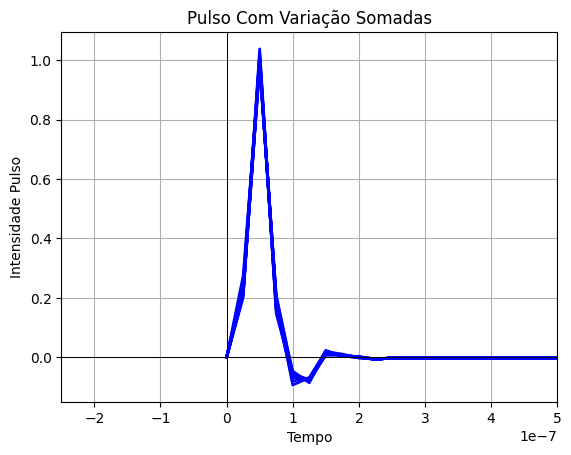

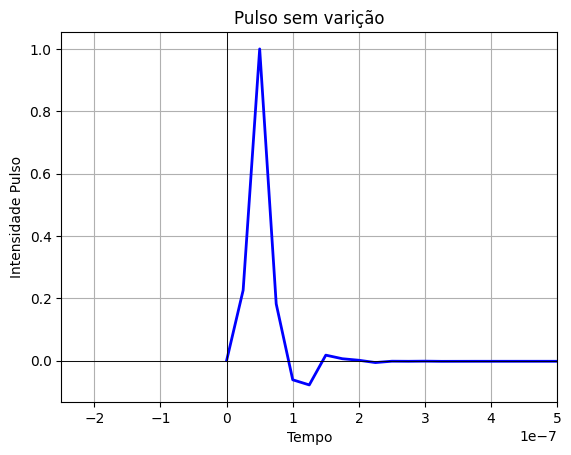

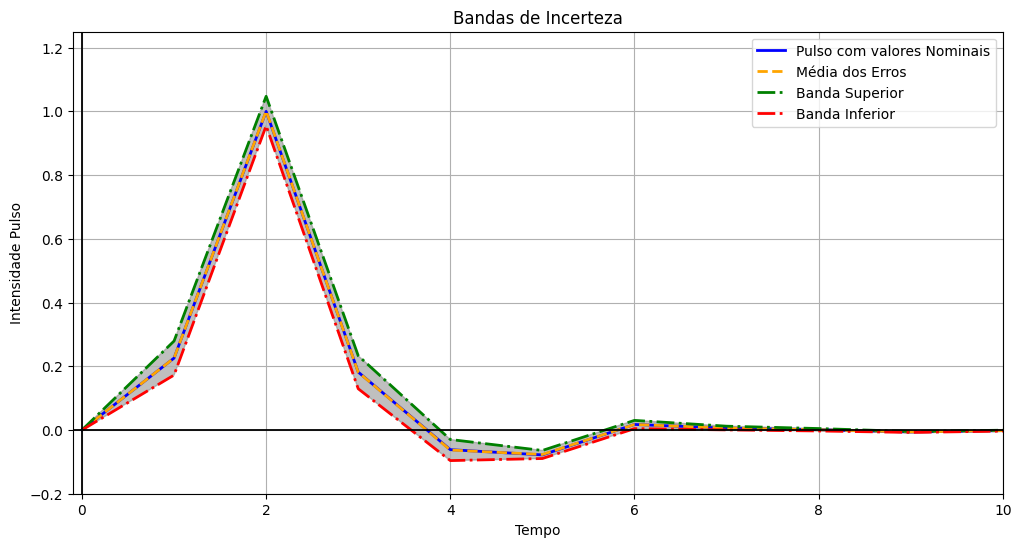

'\nOutput: (graficos)\n\n- Pulso com as variaçoes somadas\n- Pulso puro\n- Banda d bollinger\n'

In [14]:
### PLOT DO PULSO ###
plot_pulso(vezes, t1, y, sigma=3)

'''
Output: (graficos)

- Pulso com as variaçoes somadas
- Pulso puro
- Banda d bollinger
'''

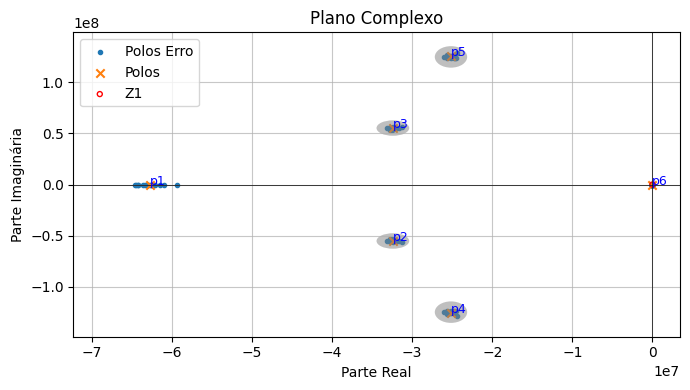

'\nOutput:\n - tds_polos1, real_pt, imag_pt # variaveis auxiliares para mapa de polos, correlacao, graph_\n - Grafico mapa de polos\n\nomitir tau no grafico - ok\np1 = sigma1 + omega1 *j \n'

In [15]:
### MAPA DE POLOS ### sem tau
real_pt, imag_pt = mapa_de_polos(tds_polos)

'''
Output:
 - tds_polos1, real_pt, imag_pt # variaveis auxiliares para mapa de polos, correlacao, graph_
 - Grafico mapa de polos

omitir tau no grafico - ok
p1 = sigma1 + omega1 *j 
'''

In [16]:
# x_coords são os valores dos componentes do circuito
# y_coords são os polos gerados para cada iteração

for mc in MC:  # atribuindo valor pra cada x_coord

    # Componentes com valorees alterados
    x_coords1.append(mc[0])
    x_coords2.append(mc[1])
    x_coords3.append(mc[2])
    x_coords4.append(mc[3])
    x_coords5.append(mc[4])
    x_coords6.append(mc[5])
    x_coords7.append(mc[6])
    x_coords8.append(mc[7])

for polo_real, polo_imag in zip(real_pt, imag_pt):  # atribuindo valor pra cada y_coord

    # Polos reais das FPs    #com os valorees dos componentes alterados
    y_coords1_real.append(polo_real[0])
    y_coords2_real.append(polo_real[1])
    y_coords3_real.append(polo_real[2])
    y_coords4_real.append(polo_real[3])
    y_coords5_real.append(polo_real[4])
    y_coords6_real.append(polo_real[5])
    # y_coords7_real.append(polo_real[6])
    # y_coords8_real.append(polo_real[7])

    # Polos imaginarios das FPs com os valorees dos componentes alterados
    y_coords1_imag.append(polo_imag[0])
    y_coords2_imag.append(polo_imag[1])
    y_coords3_imag.append(polo_imag[2])
    y_coords4_imag.append(polo_imag[3])
    y_coords5_imag.append(polo_imag[4])
    y_coords6_imag.append(polo_imag[5])
    # y_coords7_imag.append(polo_imag[6])
    # y_coords8_imag.append(polo_imag[7])


Polos P1 Real: -62757462.262026325 
Polos P2 Real: -32396483.97804095 
Polos P3 Real: -32396483.97804095 
Polos P4 Real: -25184825.362076502 
Polos P5 Real: -25184825.362076502 
Polos P6 Real: -71970.33978988482 


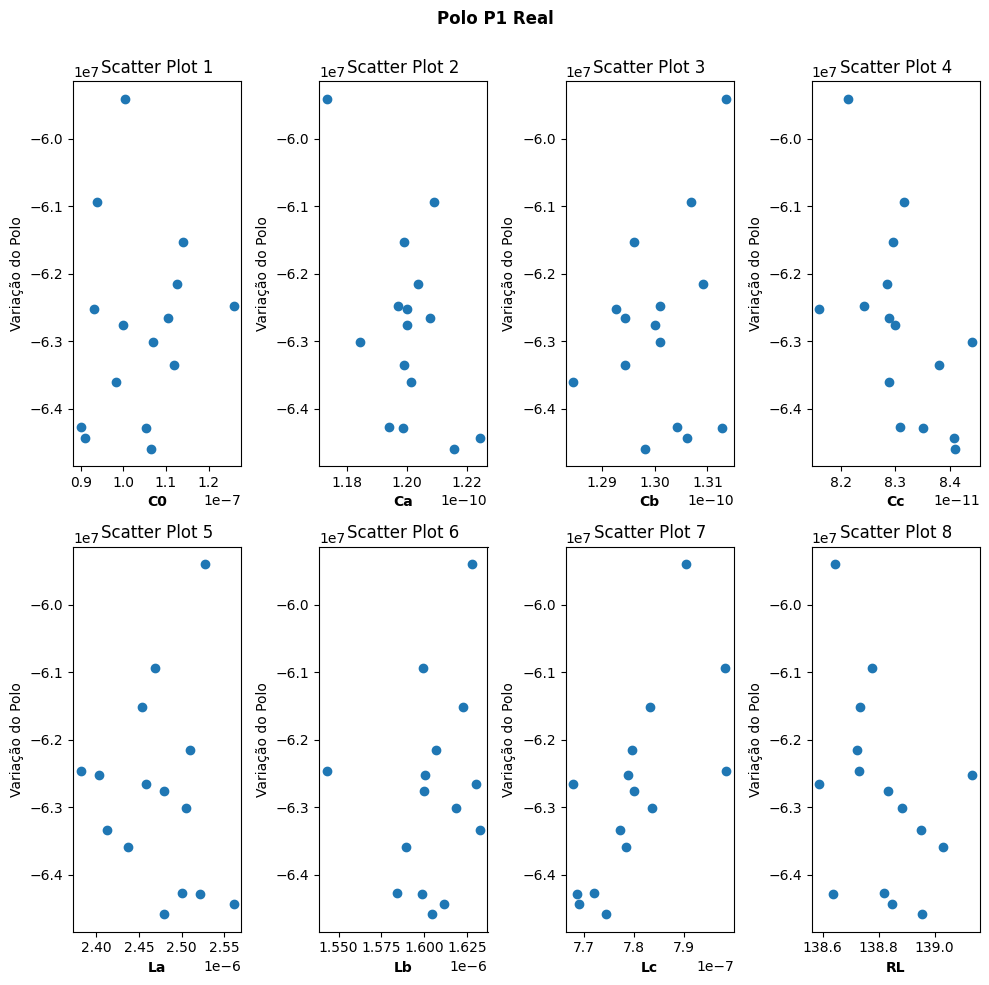

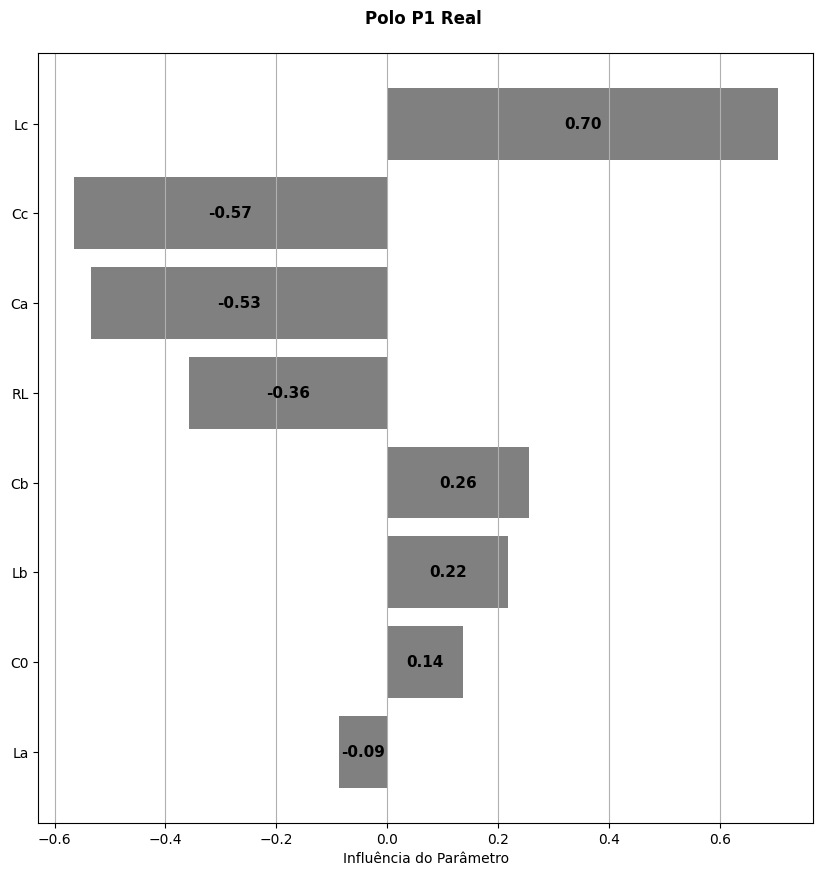

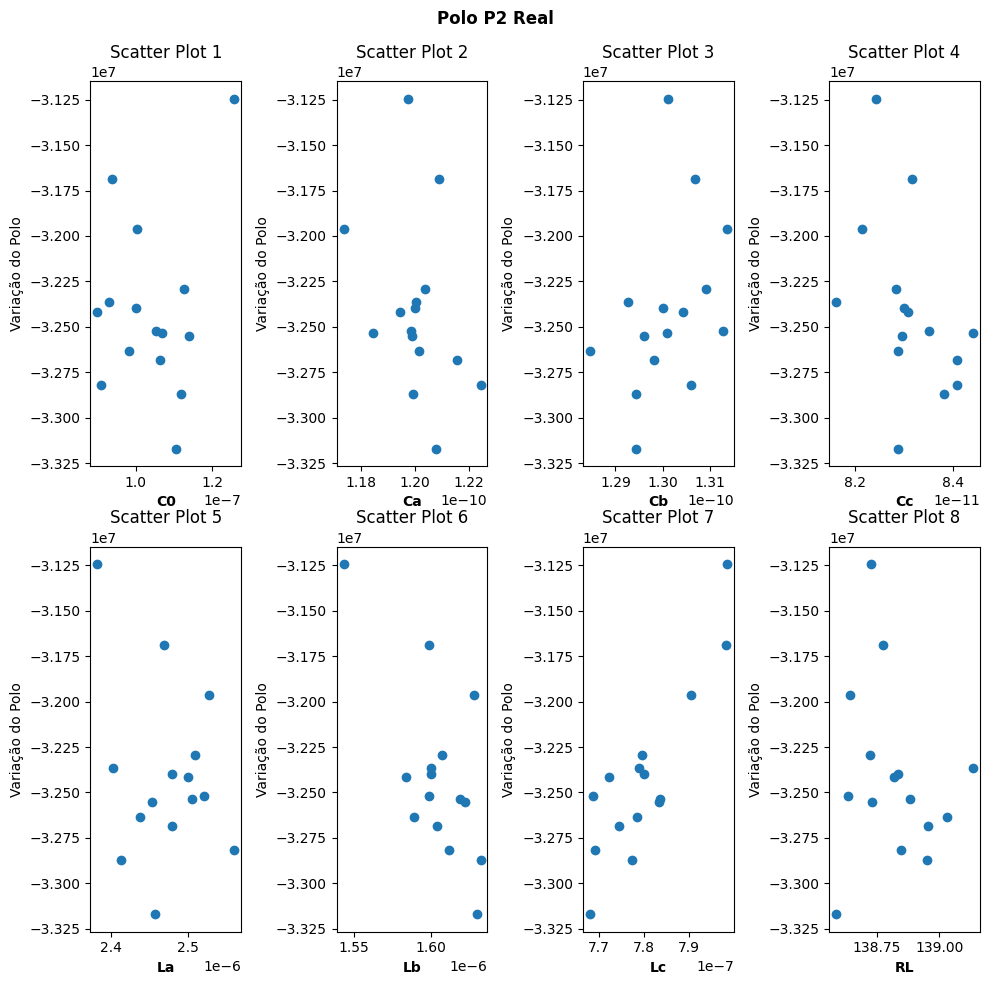

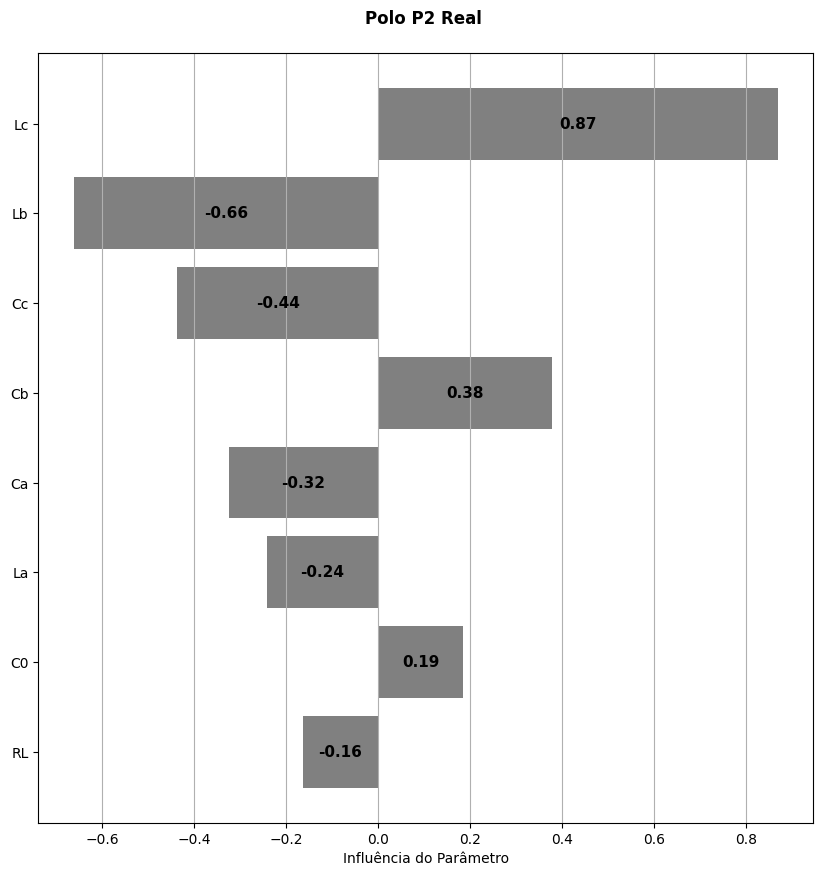

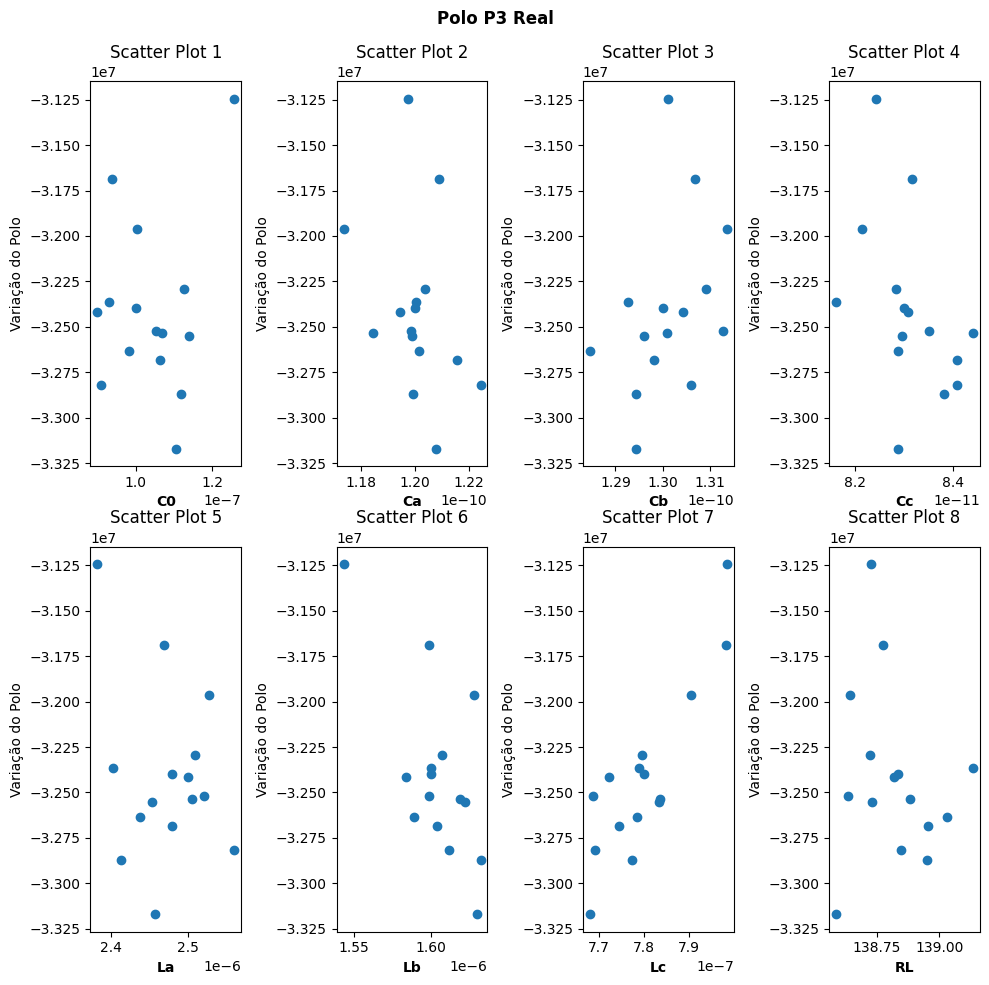

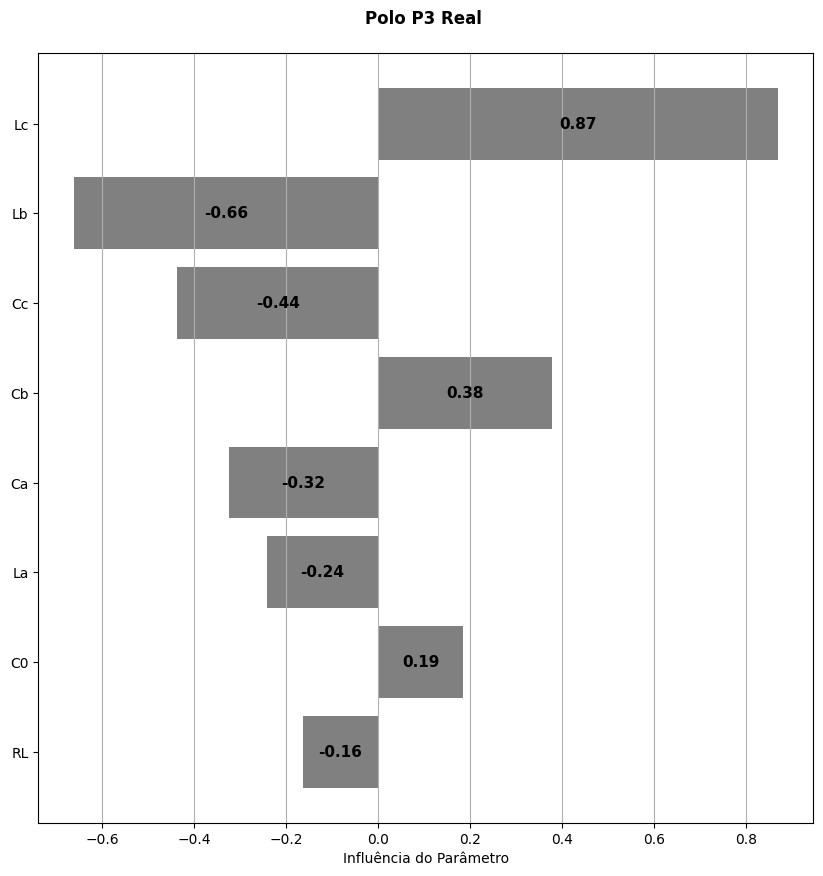

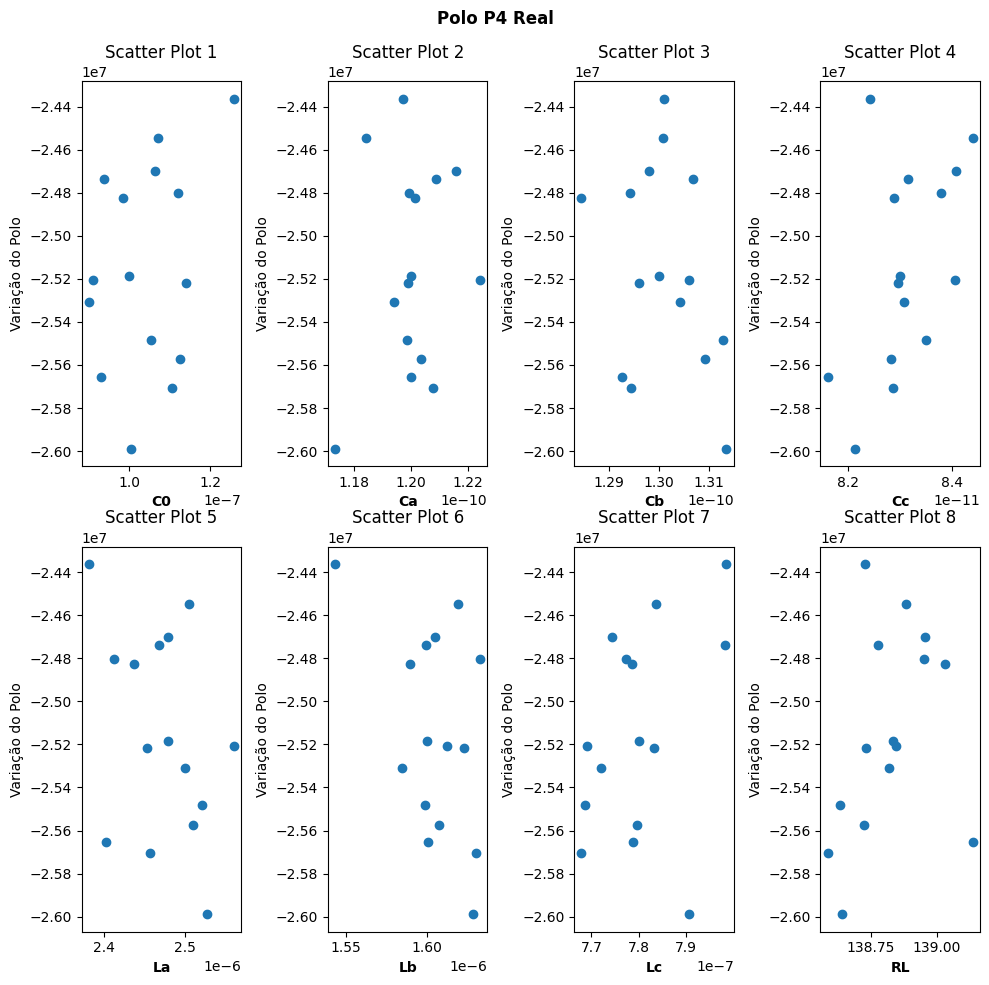

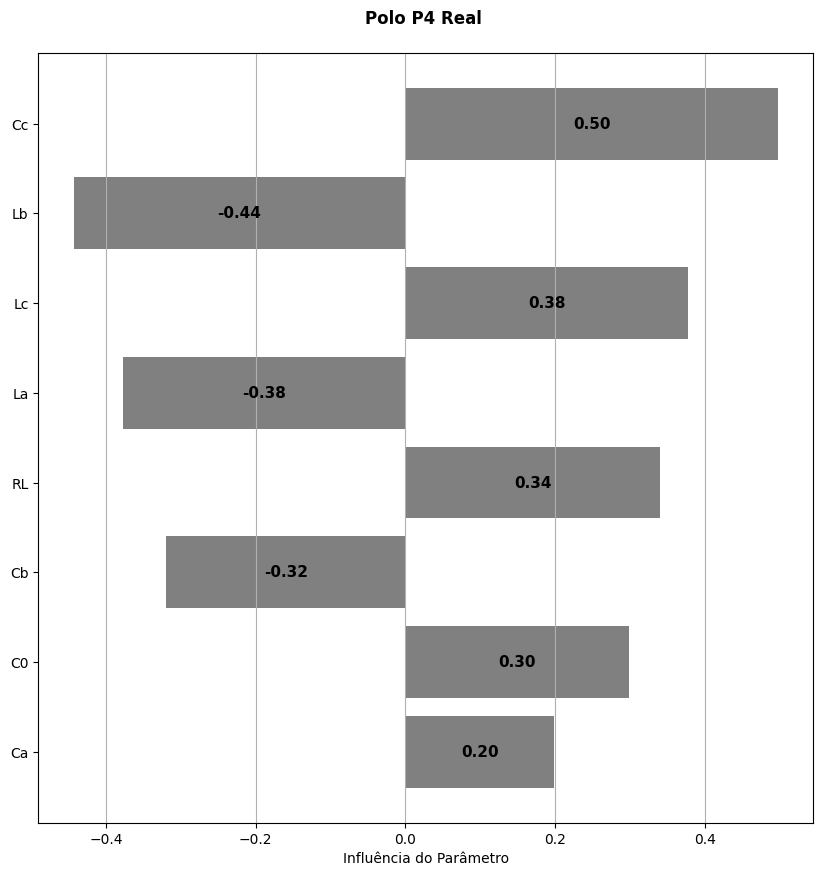

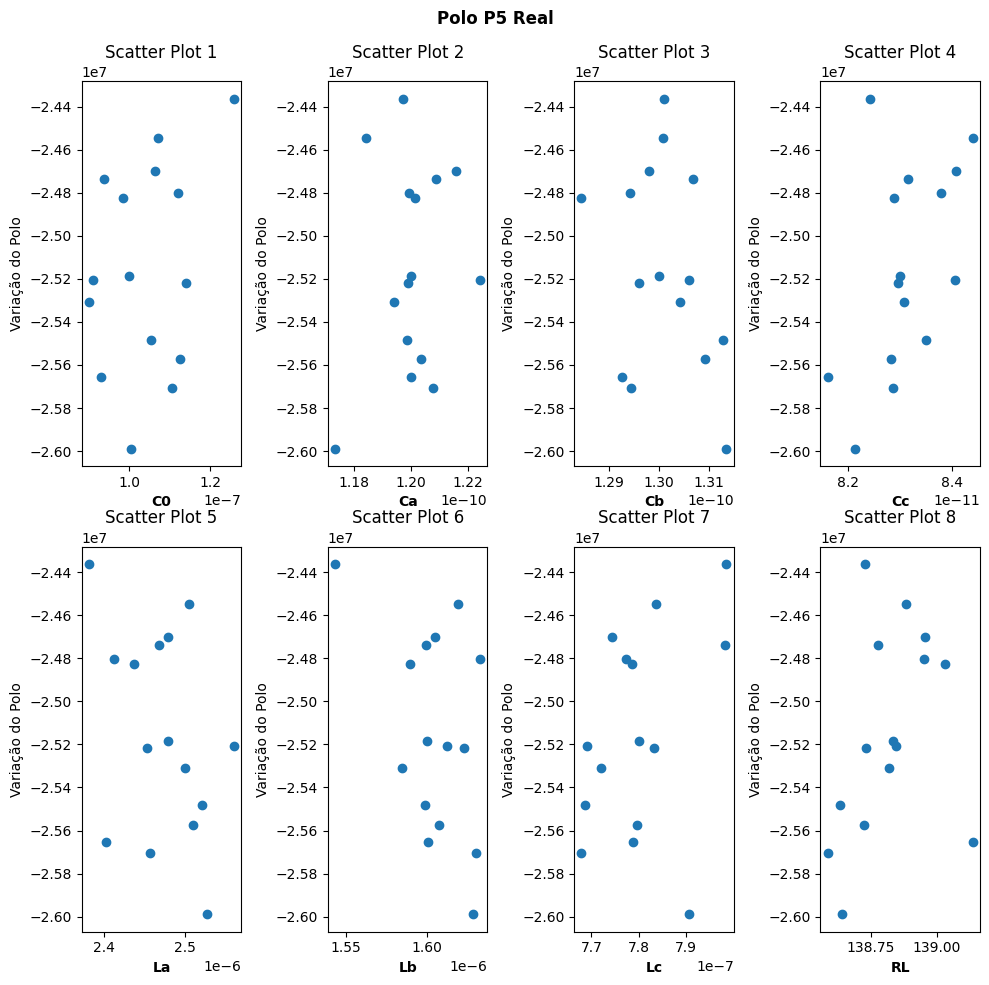

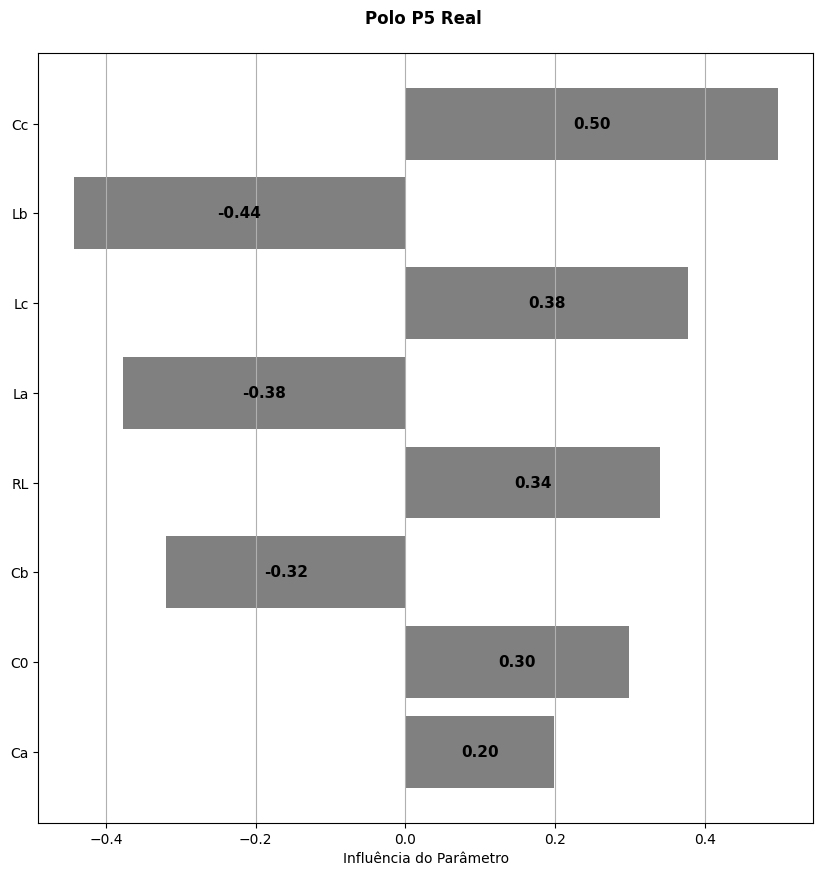

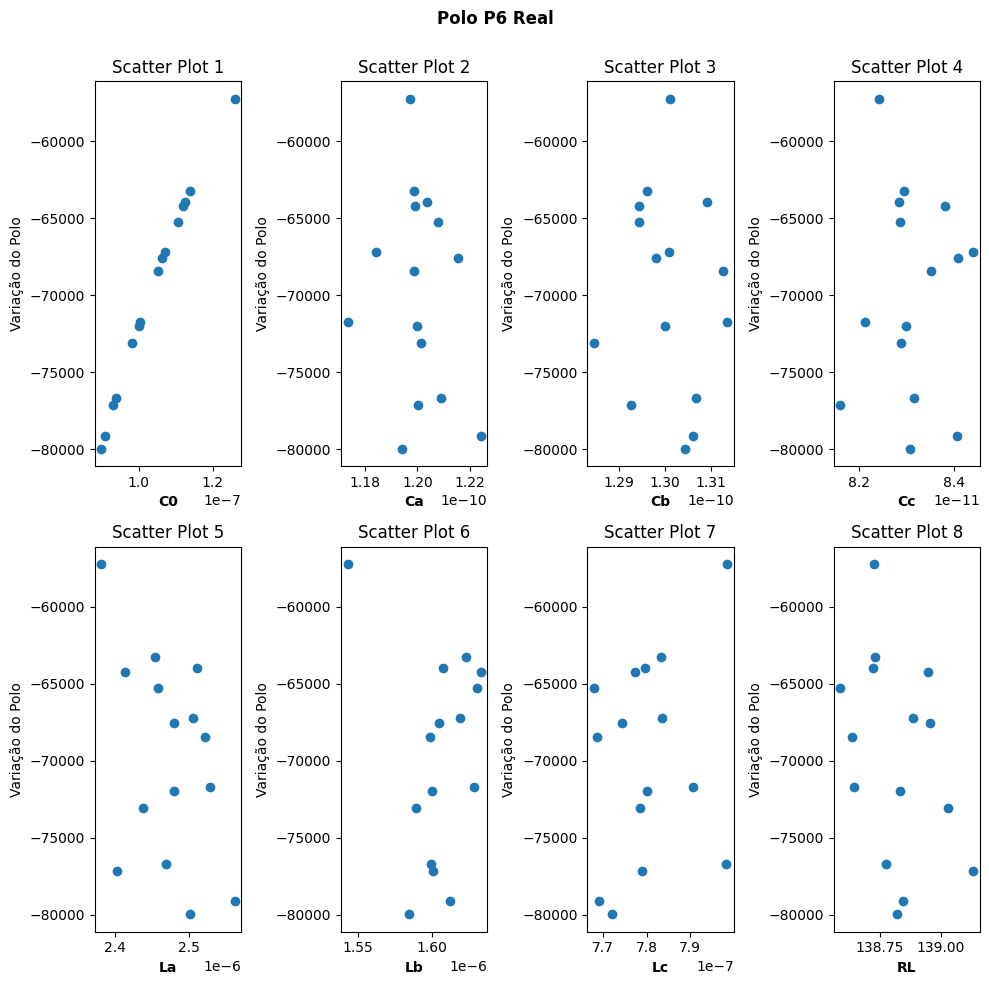

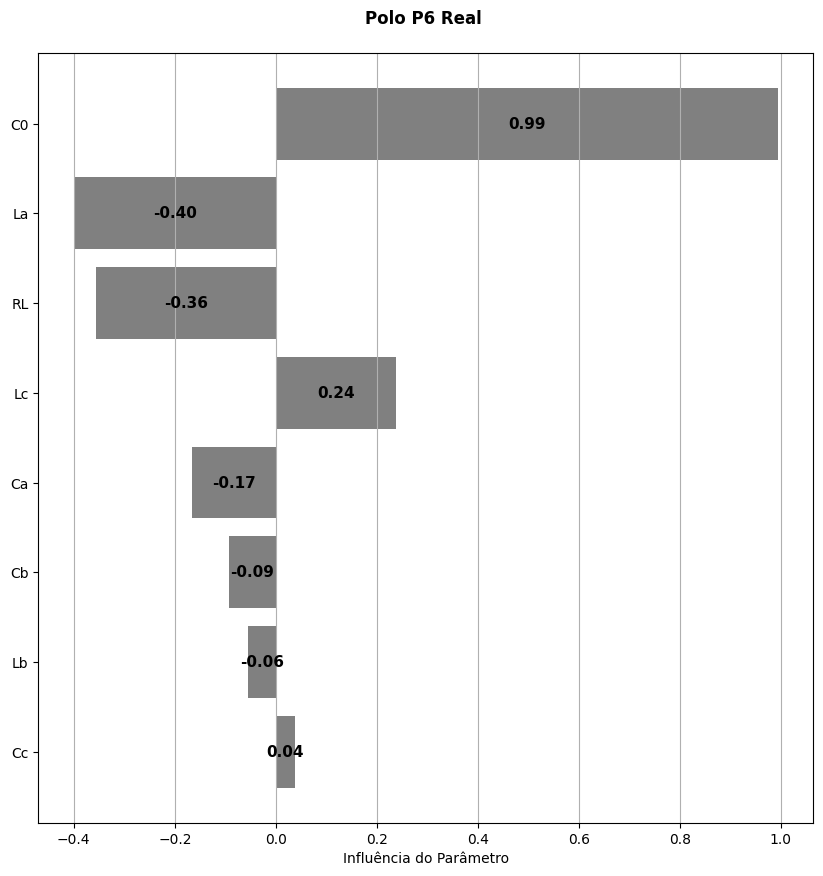

In [17]:
# Pearson8

# x_coords são os valores dos componentes do circuito
# y_coords são os polos gerados para cada iteração

nomes_real = ['P1 Real','P2 Real','P3 Real','P4 Real','P5 Real','P6 Real']
nomes_imag = ['P1 Imag','P2 Imag','P3 Imag','P4 Imag','P5 Imag','P6 Imag']
def Pearson8(real=True, imag=True):

    try:
        if real:
            for enum, y_coord in enumerate(all_y_real):
                print(f"Polos {nomes_real[enum]}: {y_coord[0]} ")
                graph_8(all_x_coord, y_coord, nome_polo=nomes_real[enum])
                correlacao(all_x_coord, y_coord, nome_polo=nomes_real[enum])

        if imag:
            for enum, y_coord in enumerate(all_y_imag):
                print(f"Polos {nomes_imag[enum]}: {y_coord[0]} ")
                graph_8(all_x_coord, y_coord, nome_polo=nomes_imag[enum])
                correlacao(all_x_coord, y_coord, nome_polo=nomes_imag[enum])
    
    except Exception as e:
        # continue
        pass

    
    plt.show()  # Mostrar todos os gráficos de uma vez


Pearson8(imag=False)

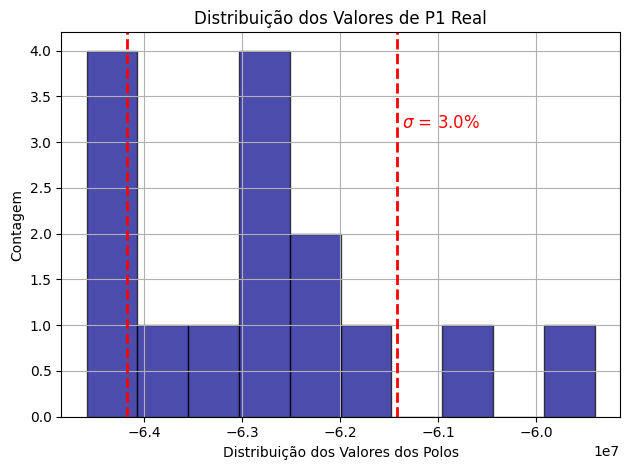

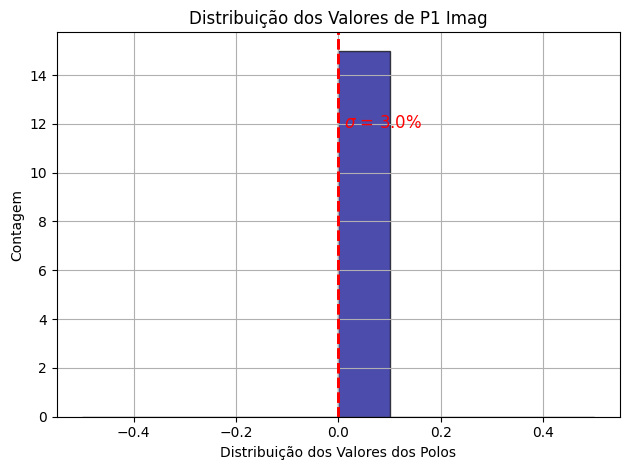

In [ ]:
# Histogramas dos polos
'''
Os polos variam conforme as distribuiçoes (hist abaixo) apos MC

Hist vem antes Scatter_8 e antes do des pad e dps do mapa d polo 

mapa de polo
Histograma dos polos
desvio padrao dos polos
Scatter_8
'''

def histograma(dados, nome_polo, sigma, save=False):
    '''
    Histogrma dos polos com os valores de y_real e y_imag
    '''

    for enum, y_coord in enumerate(dados):
        if not dados:
            continue

        # Criar histograma
        media = np.mean(y_coord)
        desvio = np.std(y_coord, ddof=0)  # ddof=0 para população
        plt.hist(y_coord, bins=10, color='darkblue', edgecolor='black', alpha=0.7)
        plt.axvline(media + desvio, color='red', linestyle='dashed', linewidth=2, label='Desvio Padrão')
        plt.axvline(media - desvio, color='red', linestyle='dashed', linewidth=2, label='Desvio Padrão')
          
        # σ text
        # width X axis
        width_x = plt.xlim()[1] - plt.xlim()[0]
        sigma_percent = '3.0%' #f"{abs(desvio / media) * 100:.2f}%"
        plt.text(media + desvio + 0.009 * width_x, plt.ylim()[1] * 0.75, rf'$\sigma$ = {sigma_percent}', color='red', fontsize=12)
        
        # Títulos e rótulos
        plt.title(f"Distribuição dos Valores de {nome_polo[enum]}")
        # plt.legend()
        plt.xlabel("Distribuição dos Valores dos Polos")
        plt.ylabel("Contagem")
        
        # Layout bonito
        plt.tight_layout()
        plt.grid(True)

        # Salvar figura
        if save:
            salvar_figura(f'hist_{nome_polo[enum]}', pasta=r'figs/histogramas')
        
        # Plot   
        plt.show()
        break


nomes_real = ['P1 Real','P2 Real','P3 Real','P4 Real','P5 Real','P6 Real']
nomes_imag = ['P1 Imag','P2 Imag','P3 Imag','P4 Imag','P5 Imag','P6 Imag']
histograma(all_y_real, sigma=3, nome_polo=nomes_real)
histograma(all_y_imag, sigma=3, nome_polo=nomes_imag)